# G4Bench benchmark results
Geant4 : v11.0.3 Single Thread Performance

- AMD EPYC 7643 (2.3GHz / 3.6GHz) 48 cores x 2 SMT : AlmaLinux 8.6
- AMD Ryzen Threadripper PRO 3995WX (2.7GHz / 4.2GHz) 64 cores x 1 SMT : Ubuntu 20.04LTS
- Intel Xeon Gold 6336Y (2.4GHz / 3.6GHz) 24cores x 2 HT : Ubuntu 20.04LTS
- Intel Core i9-12900K (3.2GHz / 5.2GHz + 2.4GHz / 3.9GHz) 8 cores(P) HT + 8 cores (E) : Ubuntu 20.04LTS
- Apple M1 Ultra 16 cores (P) + 4 cores (E) (ARMv8) : macOS Monterey 12.6

In [67]:
import pandas
import json
import os

In [68]:
data_dir = "./data/11.0.3/"
cpu_list = os.listdir(data_dir)
cpu_list

['ryzen_trpro_3995wx', 'epyc_7643', 'xeon_gold_6336y', 'i9-12900k', 'm1_ultra']

In [80]:
def make_df(data_dir, data_header):
    df_cpu = pandas.DataFrame(columns = ['name', 'date', 'cpu', 'g4version', 'thread', 'event', 'time', 'init', 'tpe', 'eps', 'sps', 'edep'])
    cpu_list = os.listdir(data_dir)
    for cpu in cpu_list:
        df = pandas.read_json(data_dir + "/" + cpu + "/" + data_header + ".json")
        df_cpu = pandas.concat([df_cpu, df[df['thread']==1]], axis=0)

    df_sorted = df_cpu.sort_values('sps')
    df_sorted.reset_index(drop=True, inplace=True)
    return df_sorted

## ECAL e- 1GeV shower simulation

In [81]:
df_ecal = make_df("data/11.0.3/", "ecal_e1000")
df_ecal

,name,date,cpu,g4version,thread,event,time,init,tpe,eps,sps,edep
0,ecal_e1000,2022-10-12 02:10:28,AMD Ryzen Threadripper PRO 3995WX 64-Cores,1103,1,20000,109.743,0.002417,5.48714,0.182248,792.327,967.646
1,ecal_e1000,2022-10-12 02:11:41,AMD EPYC 7643 48-Core Processor,1103,1,20000,102.225,0.002966,5.11124,0.195653,850.603,967.646
2,ecal_e1000,2022-10-12 02:13:27,Intel(R) Xeon(R) Gold 6336Y CPU @ 2.40GHz,1103,1,20000,100.987,0.001946,5.04933,0.19805,861.024,967.646
3,ecal_e1000,2022-10-12 02:25:29,Apple M1 Ultra,1103,1,20000,62.1517,0.00158,3.10758,0.321802,1399.0,967.633
4,ecal_e1000,2022-10-12 02:20:01,12th Gen Intel(R) Core(TM) i9-12900K,1103,1,20000,57.0998,0.001125,2.85499,0.350271,1522.81,967.646


In [71]:
import matplotlib.pyplot as plt

In [72]:
def plot_sps(df, title="Benchmark", color="C0"):
    plt.rcdefaults()
    fig, cpu_plot = plt.subplots(figsize=(12,6))
    cpu_plot.barh(df['cpu'], df['sps'], align='center', color=color)
    cpu_plot.set_title(title)
    cpu_plot.set_xlabel('SPS (Steps/Second)')
    nplots = len(df)
    for iy in range(0,nplots) :
        xpos = df['sps'][iy] * 0.6
        plt.text(xpos, iy, df['sps'][iy], verticalalignment='center', color='white')
    plt.show()

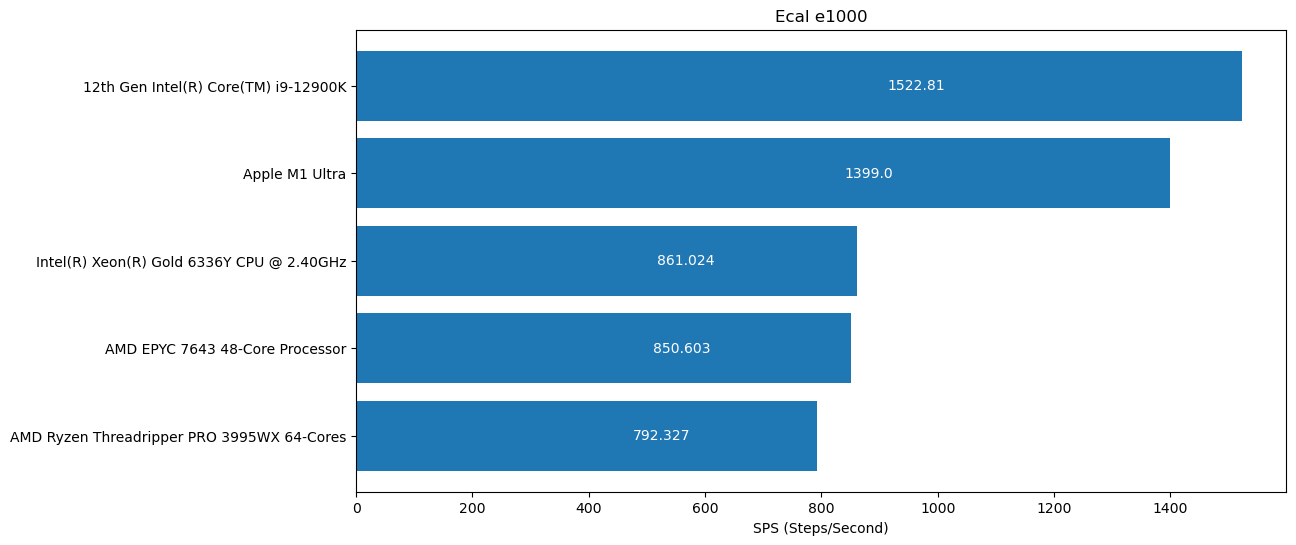

In [73]:
plot_sps(df_ecal, "Ecal e1000")

## HCAL proton 10GeV hadron shower simulation

In [74]:
df_hcal = make_df("data/11.0.3/", "hcal_p10")
df_hcal

,name,date,cpu,g4version,thread,event,time,init,tpe,eps,sps,edep
0,hcal_p10,2022-10-12 02:44:28,AMD Ryzen Threadripper PRO 3995WX 64-Cores,1103,1,4000,128.678,0.00145,32.1695,0.031086,474.446,836.371
1,hcal_p10,2022-10-12 02:48:55,AMD EPYC 7643 48-Core Processor,1103,1,4000,123.158,0.003134,30.7894,0.03248,495.718,836.371
2,hcal_p10,2022-10-12 02:39:32,Intel(R) Xeon(R) Gold 6336Y CPU @ 2.40GHz,1103,1,4000,117.656,0.001671,29.414,0.033998,518.893,836.371
3,hcal_p10,2022-10-12 02:34:18,Apple M1 Ultra,1103,1,4000,70.3818,0.00087,17.5955,0.056834,872.19,842.989
4,hcal_p10,2022-10-12 02:30:35,12th Gen Intel(R) Core(TM) i9-12900K,1103,1,4000,63.0887,0.000955,15.7722,0.063404,967.7,836.371


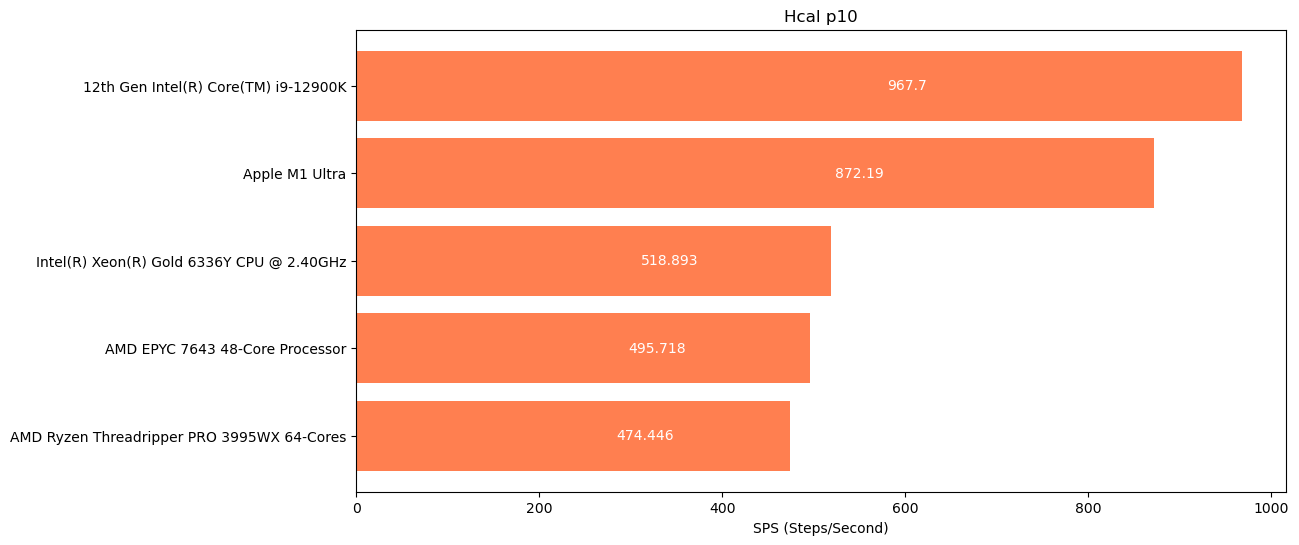

In [75]:
plot_sps(df_hcal, "Hcal p10", color="coral")

## VGEO X-ray 18MV water phantom simulation

In [76]:
df_vgeo = make_df("data/11.0.3/", "vgeo_x18")
df_vgeo

,name,date,cpu,g4version,thread,event,time,init,tpe,eps,sps,edep
0,vgeo_x18,2022-10-12 03:23:30,AMD Ryzen Threadripper PRO 3995WX 64-Cores,1103,1,500000,108.008,0.001698,0.216017,4.62935,954.126,1.89852
1,vgeo_x18,2022-10-12 03:28:46,AMD EPYC 7643 48-Core Processor,1103,1,500000,100.916,0.003029,0.201833,4.95475,1021.19,1.89852
2,vgeo_x18,2022-10-12 03:08:02,Intel(R) Xeon(R) Gold 6336Y CPU @ 2.40GHz,1103,1,500000,96.601,0.001426,0.193202,5.17601,1066.79,1.89852
3,vgeo_x18,2022-10-12 02:43:35,Apple M1 Ultra,1103,1,500000,57.2433,0.000822,0.114487,8.73478,1800.27,1.89852
4,vgeo_x18,2022-10-12 02:42:04,12th Gen Intel(R) Core(TM) i9-12900K,1103,1,500000,57.2089,0.001029,0.114418,8.74005,1801.36,1.89852


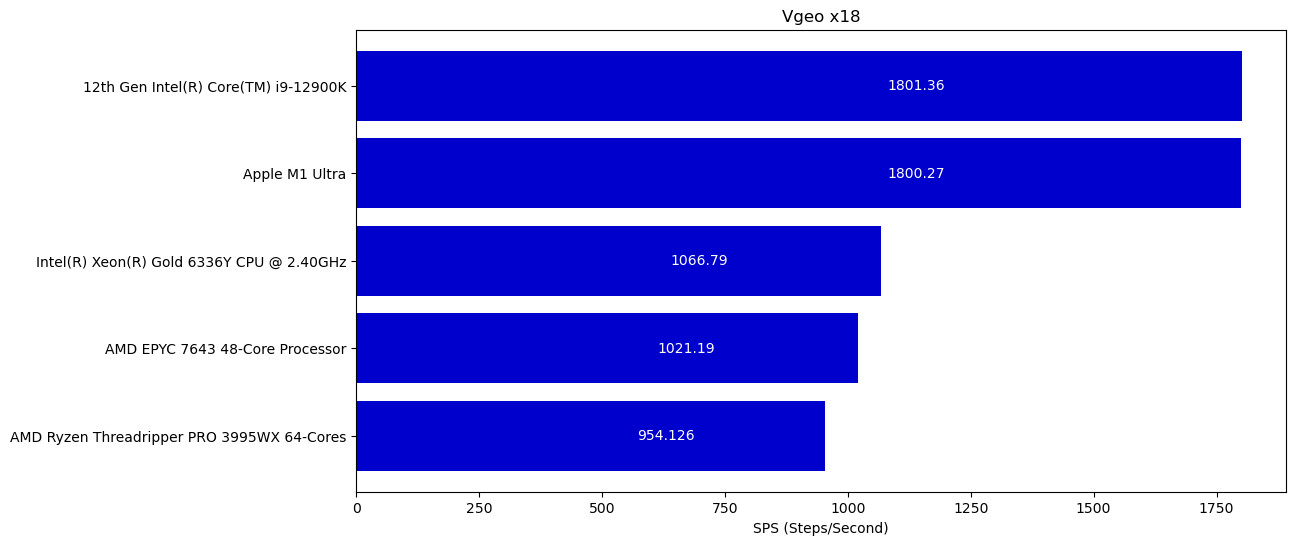

In [77]:
plot_sps(df_vgeo, "Vgeo x18", color="mediumblue")